In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

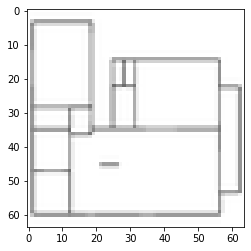

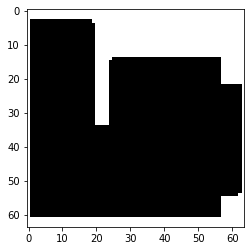

In [2]:
image = cv2.imread('sample2.png',cv2.IMREAD_GRAYSCALE).astype('float32')/255
shape_i = np.ones((64,64))
for i in range(64):
    idxs = np.where(image[i,:]<.9)[0]
    if len(idxs):
        shape_i[i,min(idxs):max(idxs)+1] = (max(idxs)-min(idxs)+1)*[0.]

shape_j = np.ones((64,64))
for j in range(64):
    idxs = np.where(image[:,j]<.9)[0]
    if len(idxs):
        shape_j[min(idxs):max(idxs)+1,j] = (max(idxs)-min(idxs)+1)*[0.]
        
shape = 1-(1-shape_i)*(1-shape_j)
plt.imshow(np.stack(3*[image],axis=2))
plt.show()
plt.imshow(np.stack(3*[shape],axis=2))
plt.show()


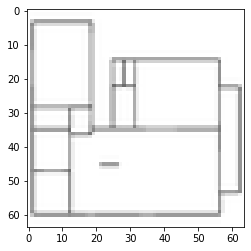

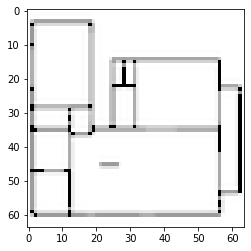

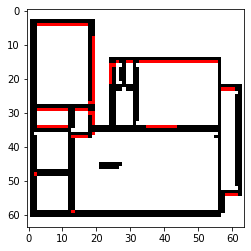

In [3]:
image = cv2.imread('sample2.png',cv2.IMREAD_GRAYSCALE).astype('float32')/255
plt.imshow(np.stack(3*[image],axis=2))
plt.show()

new = np.zeros((64,64,3))
indices_white_i,indices_white_j  = np.where(image<0.6)
new[indices_white_i,indices_white_j,:] = 0
indices_black_i,indices_black_j = np.where(image>0.97)
new[indices_black_i,indices_black_j,:] = 1
indices_red_i, indices_red_j = np.where((image>0.80)& (image<0.88))
new[indices_red_i,indices_red_j,0] = 1

image[image<0.6] = 0
plt.imshow(np.stack(3*[image],axis=2))
plt.show()
plt.imshow(new)
plt.show()

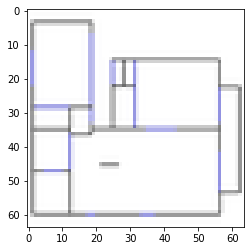

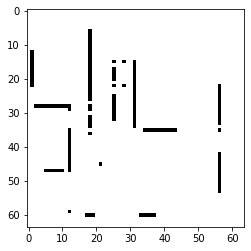

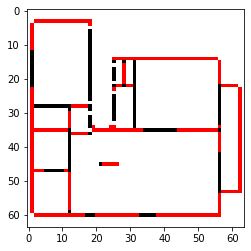

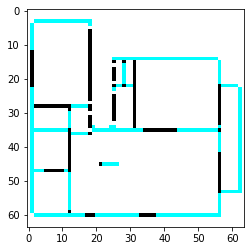

In [4]:
image = cv2.imread('sample2.png').astype('float32')/255
plt.imshow(image)
plt.show()

new = np.zeros((64,64,3))

indices_white_i,indices_white_j  = np.where(image[:,:,0]<0.2)
new[indices_white_i,indices_white_j,:] = 0

indices_black_i,indices_black_j = np.where(image[:,:,1]>0.72)

new[indices_black_i,indices_black_j,:] = 1

indices_red_i, indices_red_j = np.where((image[:,:,0]>0.5)& (image[:,:,1]<0.70)& (image[:,:,2]<0.7))

new[indices_red_i,indices_red_j,0] = 1
new[indices_red_i,indices_red_j,1:] = 0

bis = np.stack(3*[new[:,:,0]],axis = 2)

plt.imshow(bis)
plt.show()
bis[:,:,0] = new[:,:,1]
plt.imshow(new)
plt.show()
plt.imshow(bis)
plt.show()